In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
d = pd.read_csv("GF178_N_18_Raw.csv", header = None) # header None 을 안해서,, 

In [4]:
c = pd.read_csv("GF178_N_20_Filtered.csv", header = None)

In [6]:
# 20th, to check walking and turning
def want_fig_20(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    gr.xticks(data == 1)
    return gr

In [11]:
check = c.iloc[:,0]
for i in enumerate(check):
    if i[1] == 1:
        print(i[0])
checkList = []
for i in enumerate(check):
    if i[1] ==1:
        checkList.append(i[0])
#print(checkList)
#Remove the very first and the last
checkList[1:-1]

2313
2829
5805
7581
10497
12057
14973
16593
19401
20997
23733
25437
28185
29361


[2829,
 5805,
 7581,
 10497,
 12057,
 14973,
 16593,
 19401,
 20997,
 23733,
 25437,
 28185]

In [12]:
# get three columns
def get_three_acc(df):
    cut_df = df.iloc[:, 1:4]
    return cut_df

In [14]:
d_acc = get_three_acc(d)
d_acc_part = d_acc.iloc[7580:12056,:]

In [15]:
# draw graph
def want_fig(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    return gr

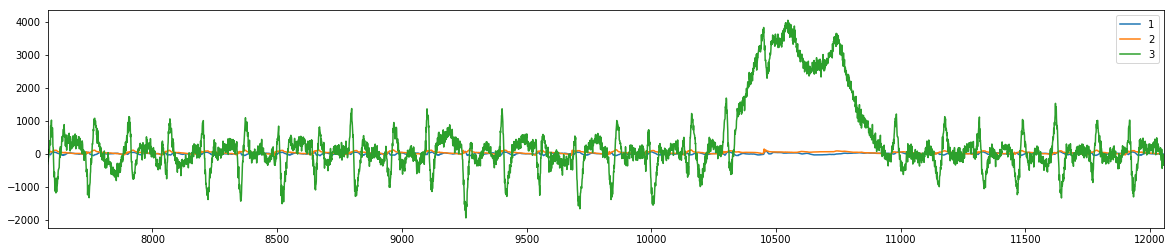

In [16]:
want_fig(d_acc_part)

In [17]:
d2 = pd.read_csv("GF313_N_18_Raw.csv", header = None)
c2 = pd.read_csv("GF313_N_20_Filtered.csv", header = None)

In [18]:
check2 = c2.iloc[:,0]
for i in enumerate(check2):
    if i[1] == 1:
        print(i[0])

2039
2411
4523
5723
7775
8843
10739
11819
13727
15107
16931
17939
19787
20795


In [19]:
check2List = []
for i in enumerate(check2):
    if i[1] ==1:
        check2List.append(i[0])
print(check2List)
check2List[1:-1]

[2039, 2411, 4523, 5723, 7775, 8843, 10739, 11819, 13727, 15107, 16931, 17939, 19787, 20795]


[2411, 4523, 5723, 7775, 8843, 10739, 11819, 13727, 15107, 16931, 17939, 19787]

In [20]:
d2_acc = get_three_acc(d2)
d2_acc_part = d2_acc.iloc[5722:8842,:]

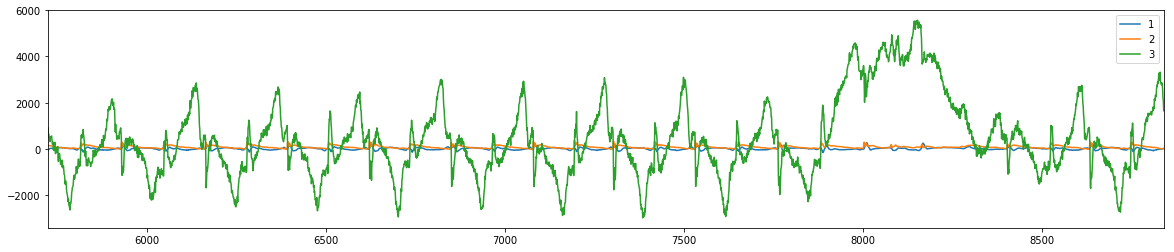

In [21]:
want_fig(d2_acc_part)

In [22]:
print("# of d: ", len(d_acc_part), " and # of d2: ",len(d2_acc_part))

# of d:  4476  and # of d2:  3120


In [24]:
d_nor = d_acc_part.iloc[1:3001, :]

In [25]:
d_abn = d2_acc_part.iloc[1:3001,:]

In [26]:
d_nor.head(3)

,1,2,3
7581,4,0,-184
7582,3,60,-232
7583,-5,88,-124


In [27]:
d_abn.head(3)

,1,2,3
5723,-46,151,922
5724,-33,150,630
5725,-23,146,638


In [30]:
kk = np.array(d_nor.T)

In [32]:
kk # index normal with 0, and Abnormal cases with 1

array([[   4,    3,   -5, ...,   29,   29,   28],
       [   0,   60,   88, ...,   39,   40,   38],
       [-184, -232, -124, ..., 3442, 3478, 3506]], dtype=int64)

In [35]:
y_kk = np.array([0,0,0])

In [33]:
dd = np.array(d_abn.T)

In [34]:
dd

array([[  -46,   -33,   -23, ...,    25,     2,    11],
       [  151,   150,   146, ...,    19,    23,    22],
       [  922,   630,   638, ..., -2730, -2460, -2282]], dtype=int64)

In [36]:
y_dd = np.array([1,1,1])

In [41]:
X = np.concatenate((kk,dd))

In [42]:
y = np.concatenate((y_kk, y_dd))

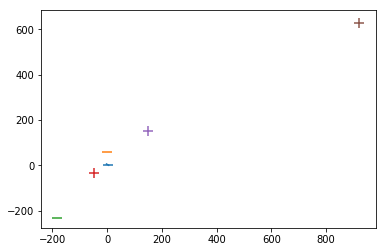

In [45]:
# Useless ........ need to PCA first, to reduce this dim to 2

for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [47]:
X

array([[    4,     3,    -5, ...,    29,    29,    28],
       [    0,    60,    88, ...,    39,    40,    38],
       [ -184,  -232,  -124, ...,  3442,  3478,  3506],
       [  -46,   -33,   -23, ...,    25,     2,    11],
       [  151,   150,   146, ...,    19,    23,    22],
       [  922,   630,   638, ..., -2730, -2460, -2282]], dtype=int64)

In [48]:
y

array([0, 0, 0, 1, 1, 1])

In [49]:
from sklearn import svm
clf = svm.SVC()

In [50]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# Normal test: d_nor 16592:20993 , slice 3000
# Abnormal test: d_abn 11818:15106

In [53]:
d_acc_part3 = d_acc.iloc[16592:20996,:]
d2_acc_part3 = d2_acc.iloc[11818:15106,:]

In [54]:
print("# of d: ", len(d_acc_part3), " and # of d2: ",len(d2_acc_part3))

# of d:  4404  and # of d2:  3288


In [55]:
d_nor_test = d_acc_part3.iloc[1:3001, :]
d_abn_test = d2_acc_part3.iloc[1:3001,:]

In [57]:
d_nor_test = np.array(d_nor_test)

In [60]:
d_nor_test =d_nor_test.T

In [61]:
clf.predict(d_nor_test)

array([1, 1, 1])

In [62]:
d_abn_test = np.array(d_abn_test.T)

In [63]:
clf.predict(d_abn_test)

array([1, 1, 1])

### Not effective yet. LOL
## Conclution
### - Need to modify, and build some other diverse models, since this simple SVM is not properly classiffy NORMAL and ABNORMAL